## Word Embedding using Word2Vec:
In this Notebook i will see Word Embeddings.

In [1]:
!pip install nltk
!pip install gensim

  Created wheel for smart-open: filename=smart_open-4.0.1-py3-none-any.whl size=108251 sha256=6357ff4e4e4845ab20ee426867b9d047b1f74c18e6d286511b51608dae301602
  Stored in directory: c:\users\dream walker\appdata\local\pip\cache\wheels\34\3d\14\f19c01a19c9201cdb6a76b049904d5226912569be919ad1eae
Successfully built smart-open


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
warnings.filterwarnings(action = 'ignore') 
import gensim 
from gensim.models import Word2Vec 

sample = open("alice30.txt", "r") 
s = sample.read() 

In [3]:
# Replaces escape character with space 
f = s.replace("\n", " ") 
data = [] 

# iterate through each sentence in the file 
for i in sent_tokenize(f): 
	temp = [] 
	
	# tokenize the sentence into words 
	for j in word_tokenize(i): 
		temp.append(j.lower()) 

	data.append(temp) 

In [4]:
# Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1, 
							size = 100, window = 5) 
# Print results 
print("Cosine similarity between 'alice' " +
			"and 'wonderland' - CBOW : ", 
	model1.similarity('alice', 'wonderland')) 
	
print("Cosine similarity between 'alice' " +
				"and 'machines' - CBOW : ", 
	model1.similarity('alice', 'machines')) 

# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
											window = 5, sg = 1) 

# Print results 
print("Cosine similarity between 'alice' " +
		"and 'wonderland' - Skip Gram : ", 
	model2.similarity('alice', 'wonderland')) 
	
print("Cosine similarity between 'alice' " +
			"and 'machines' - Skip Gram : ", 
	model2.similarity('alice', 'machines')) 

Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.9963983
Cosine similarity between 'alice' and 'machines' - CBOW :  0.98568434
Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.92214704
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.9084455


Output indicates the cosine similarities between word vectors ‘alice’, ‘wonderland’ and ‘machines’ for different models. One interesting task might be to change the parameter values of ‘size’ and ‘window’ to observe the variations in the cosine similarities.
 

Applications of Word Embedding :

>> Sentiment Analysis
>> Speech Recognition
>> Information Retrieval
>> Question Answering

In [5]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]


In [6]:
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)


Word2Vec(vocab=14, size=100, alpha=0.025)


In [7]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)


['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [9]:
# access vector for one word
print(model['for'])


[ 3.0698329e-03  4.2220536e-03 -3.9259917e-03 -2.4417255e-03
 -3.8187443e-03 -1.1129273e-03  2.4373997e-03  2.0454287e-04
 -2.4111937e-03 -4.5833956e-03  3.6486366e-03 -4.4108657e-03
 -1.1958176e-03  2.0299191e-03 -2.5407453e-03  3.1551123e-03
  1.9181884e-03  8.2154822e-04  3.2323590e-03  8.4506290e-04
  2.4760002e-03  4.5351726e-03 -7.4299268e-04 -1.2467725e-03
  3.3307408e-03  6.8487460e-04 -3.1238757e-03  2.9053434e-03
 -4.8637614e-03  3.0041959e-03 -1.7316098e-03 -1.1653038e-03
 -1.3408174e-04 -3.6667141e-03 -1.6960814e-03  3.0979388e-03
 -2.0335577e-03  4.8943087e-03  4.1333106e-03  2.5576823e-03
 -4.1434253e-03  3.5901521e-03 -1.9664783e-03  4.9138940e-03
 -3.5593248e-04  4.9087233e-03 -3.5135786e-03 -1.6799073e-04
 -3.1931594e-03  4.1496856e-03  4.8213247e-03 -3.2537533e-03
  4.7177821e-03  1.8919674e-03  3.6120622e-03 -1.0516341e-03
 -1.1661794e-03  3.8085990e-03  4.6004439e-04  3.2093638e-04
 -2.7747644e-04  1.2893284e-03  3.7623716e-03 -2.4743646e-03
 -4.0319143e-03  2.24439

In [10]:
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


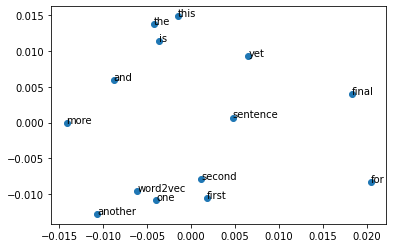

In [11]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


In [12]:
!python3 -m spacy download en_core_web_sm
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019126 sha256=f319cec9c17fb376cfdeedc90444c24c9cb672db629a8055556fe1063c2d4c44
  Stored in directory: c:\users\dream walker\appdata\local\pip\cache\wheels\64\69\41\6f820cf1d7488a0381a2059f66ec9f8f23116f7c67d18f3d8d
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.3.1
    Uninstalling en-core-web-sm-2.3.1:
      Successfully uninstalled en-core-web-sm-2.3.1


In [13]:
#!python3 -m spacy download en_core_web_sm
import spacy
nlp = spacy.load('en_core_web_sm')

In [14]:
nlp('lion').vector.shape

(96,)

In [15]:
doc = nlp('The quick brown fox jumped over the lazy dogs.')

doc.vector.shape

(96,)

In [16]:
# Create a three-token Doc object:
tokens = nlp(u'lion cat pet')

# Iterate through token combinations:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

lion lion 1.0
lion cat 0.36823785
lion pet 0.17687276
cat lion 0.36823785
cat cat 1.0
cat pet 0.38982964
pet lion 0.17687276
pet cat 0.38982964
pet pet 1.0


In [ ]:
# Create a three-token Doc object:
tokens = nlp(u'like love hate')

# Iterate through token combinations:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

like like 1.0
like love 0.21975423
like hate 0.028223615
love like 0.21975423
love love 1.0
love hate 0.3308294
hate like 0.028223615
hate love 0.3308294
hate hate 1.0


/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

In [17]:
tokens = nlp('dog cat nargle')

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 19.472973 True
cat True 19.326649 True
nargle True 22.392693 True
